In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import datasets
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

In [2]:
# 🔹 تحميل بيانات Fashion MNIST
(x_train, y_train), (_, _) = fashion_mnist.load_data()

In [3]:
# 🔹 تطبيع الصور وتحويلها إلى متجهات
x_train = x_train / 255.0  # تحويل القيم بين 0 و 1
x_train_flat = x_train.reshape(len(x_train), -1)  # تحويل الصور إلى متجهات

In [4]:
# 🔹 تقليل الأبعاد باستخدام PCA
pca = PCA(n_components=50)  # اختيار 50 مكونًا رئيسيًا
x_pca = pca.fit_transform(x_train_flat)

In [5]:
# 🔹 مقياس StandardScaler لتوزيع البيانات بشكل أفضل
x_scaled = StandardScaler().fit_transform(x_pca)

In [6]:
# 🔹 تطبيق DBSCAN للتجميع
dbscan = DBSCAN(eps=2, min_samples=10)  # eps يمكن ضبطه لتغيير حساسية التجميع
clusters = dbscan.fit_predict(x_scaled)

In [7]:
# 🔹 تحليل النتائج
unique_clusters = np.unique(clusters)
print(f"عدد المجموعات: {len(unique_clusters) - (1 if -1 in clusters else 0)}")  # -1 تعني الضوضاء

عدد المجموعات: 19


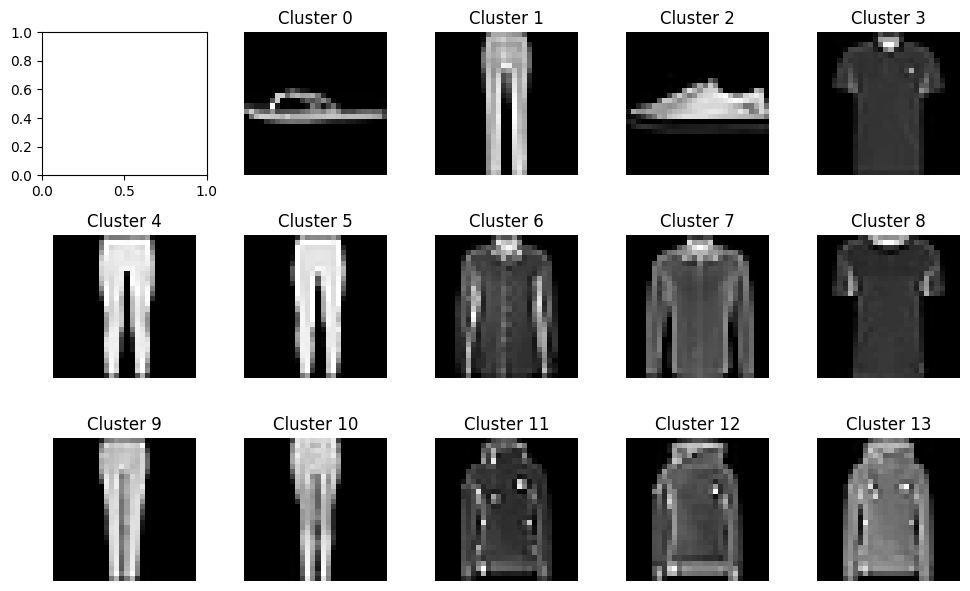

In [8]:
# 🔹 رسم بعض الصور من كل مجموعة
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for cluster_num, ax in zip(unique_clusters[:15], axes.flatten()):
    if cluster_num == -1:
        continue  # تجاهل الضوضاء
    sample_idx = np.where(clusters == cluster_num)[0][0]  # اختيار صورة من المجموعة
    ax.imshow(x_train[sample_idx], cmap='gray')
    ax.set_title(f"Cluster {cluster_num}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

In [10]:


# 🔹 تحميل بيانات Fashion MNIST
(x_train, y_train), (_, _) = fashion_mnist.load_data()

In [11]:
# 🔹 تطبيع الصور وتحويلها إلى متجهات
x_train = x_train / 255.0  # تحويل القيم بين 0 و 1
x_train_flat = x_train.reshape(len(x_train), -1)  # تحويل الصور إلى متجهات (784 ميزة)

In [12]:
# 🔹 تقليل الأبعاد باستخدام PCA
pca = PCA(n_components=50)  # الاحتفاظ بـ 50 بعد فقط
x_pca = pca.fit_transform(x_train_flat)

In [13]:
# 🔹 استخدام StandardScaler لتحسين توزيع البيانات
x_scaled = StandardScaler().fit_transform(x_pca)

In [14]:
# 🔹 إيجاد عدد المجموعات المثالي باستخدام Elbow Method
wcss = []
k_values = range(2, 15)  # تجربة القيم من 2 إلى 14

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)  # حفظ قيمة WCSS لكل k

In [ ]:
# 🔹 قياس Silhouette Score لمعرفة جودة التجميع لكل عدد مجموعات
sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    sil_scores.append(score)

In [ ]:














# 🔹 رسم منحنى Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, sil_scores, marker='o', linestyle='-', color='red')
plt.xlabel("عدد المجموعات (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score لتقييم جودة التجميع")
plt.show()

# 🔹 تطبيق KMeans بعد اختيار عدد مجموعات مناسب (هنا 10)
best_k = 10  # لأن Fashion MNIST يحتوي على 10 فئات
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10)
labels = kmeans.fit_predict(x_scaled)

# 🔹 عرض بعض الصور من كل مجموعة
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
unique_clusters = np.unique(labels)

for cluster_num, ax in zip(unique_clusters[:15], axes.flatten()):
    sample_idx = np.where(labels == cluster_num)[0][0]  # اختيار صورة من المجموعة
    ax.imshow(x_train[sample_idx], cmap='gray')
    ax.set_title(f"Cluster {cluster_num}")
    ax.axis('off')

plt.tight_layout()
plt.show()

print("✅ التجميع باستخدام KMeans انتهى بنجاح!")
